In [ ]:
# 修改多元线性回归模型
# 数据试着聚集一下

In [1]:
# analysis
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# 内嵌画图
%matplotlib inline

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression 

from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error, explained_variance_score

In [3]:
from scipy.stats import pearsonr

In [238]:
# XGB
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier
from xgboost import XGBRegressor

In [5]:
df1 = pd.read_excel("D:/学习/数学建模/2020年重庆邮电大学数学建模竞赛题目/2020年重庆邮电大学数学建模竞赛题目/B题夹/B题附件1.xlsx", sheet_name="专业1数据")
df2 = pd.read_excel("D:/学习/数学建模/2020年重庆邮电大学数学建模竞赛题目/2020年重庆邮电大学数学建模竞赛题目/B题夹/B题附件1.xlsx", sheet_name="专业2数据")
df3 = pd.read_excel("D:/学习/数学建模/2020年重庆邮电大学数学建模竞赛题目/2020年重庆邮电大学数学建模竞赛题目/B题夹/B题附件1.xlsx", sheet_name="专业3数据")

In [6]:
df1 = df1.iloc[1:, 1:].astype(float)
df2 = df2.iloc[1:, 1:].astype(float)
df3 = df3.iloc[1:, 1:].astype(float)

In [7]:
df1.columns=["A","B","C","D","E","F","G","H","I"]
df2.columns=["A","B","C","D","E","F","G","H","I","J"]
df3.columns=["A","B","C","D","E","F","G","H"]

In [8]:
# 空值太多的，直接删除；空值少的，平均值填充
print(df1.info())
print(df2.info())
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 1 to 602
Data columns (total 9 columns):
A    602 non-null float64
B    602 non-null float64
C    602 non-null float64
D    257 non-null float64
E    522 non-null float64
F    602 non-null float64
G    509 non-null float64
H    482 non-null float64
I    468 non-null float64
dtypes: float64(9)
memory usage: 42.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 1 to 623
Data columns (total 10 columns):
A    623 non-null float64
B    622 non-null float64
C    600 non-null float64
D    609 non-null float64
E    623 non-null float64
F    623 non-null float64
G    467 non-null float64
H    619 non-null float64
I    409 non-null float64
J    139 non-null float64
dtypes: float64(10)
memory usage: 48.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 1 to 489
Data columns (total 8 columns):
A    489 non-null float64
B    489 non-null float64
C    489 non-null float64
D    273 non-null floa

In [9]:
# 第一印象是对计算要求高的学科，信号与系统、离散数学相关性较高，对偏概念类的学科，微机原理与接口技术，相关性较低
# 对一般的理工学科、经管学科都有一定的正相关性
print(df1.corr())
print(df2.corr())
print(df3.corr())

          A         B         C         D         E         F         G  \
A  1.000000  0.686498  0.647767  0.515415  0.485851  0.612147  0.462411   
B  0.686498  1.000000  0.590546  0.514752  0.481442  0.615297  0.432148   
C  0.647767  0.590546  1.000000  0.469183  0.443418  0.538648  0.431328   
D  0.515415  0.514752  0.469183  1.000000  0.513787  0.632182  0.510897   
E  0.485851  0.481442  0.443418  0.513787  1.000000  0.653394  0.692133   
F  0.612147  0.615297  0.538648  0.632182  0.653394  1.000000  0.647681   
G  0.462411  0.432148  0.431328  0.510897  0.692133  0.647681  1.000000   
H  0.355599  0.353988  0.395750  0.052298  0.400913  0.375926  0.436197   
I  0.496329  0.510293  0.503350  0.599264  0.588942  0.605439  0.555402   

          H         I  
A  0.355599  0.496329  
B  0.353988  0.510293  
C  0.395750  0.503350  
D  0.052298  0.599264  
E  0.400913  0.588942  
F  0.375926  0.605439  
G  0.436197  0.555402  
H  1.000000  0.392225  
I  0.392225  1.000000  
         

In [10]:
#####################################

In [11]:
df1 = df1.drop(columns='D')
df1_E = df1[~df1['E'].isnull()]
df1_G = df1[~df1['G'].isnull()]
df1_H = df1[~df1['H'].isnull()]
df1_I = df1[~df1['I'].isnull()]

In [12]:
# 平均值填充
df2_C_mean = round(df2.mean())[2]
df2_D_mean = round(df2.mean())[3]
df2_H_mean = round(df2.mean())[7]

In [16]:
# c d h 平均值填充
df2 = df2.fillna({'C':df2_C_mean})
df2 = df2.fillna({'D':df2_D_mean})
df2_E = df2[~df2['E'].isnull()]
df2_F = df2[~df2['F'].isnull()]
df2_G = df2[~df2['G'].isnull()]
df2_H = df2.fillna({'H':df2_H_mean})
df2_I = df2[~df2['I'].isnull()]
df2_J = df2[~df2['J'].isnull()]

In [17]:
df3_D = df3[~df3['D'].isnull()]
df3_E = df3[~df3['E'].isnull()]
df3_F = df3[~df3['F'].isnull()]
df3_G = df3[~df3['G'].isnull()]
df3_H = df3[~df3['H'].isnull()]

In [18]:
####################################

In [19]:
df1_E_X = df1_E.iloc[:,:3]
df1_E_Y = df1_E['E']
df1_F_X = df1.iloc[:,:3]
df1_F_Y = df1['F']
df1_G_X = df1_G.iloc[:,:3]
df1_G_Y = df1_G['G']
df1_H_X = df1_H.iloc[:,:3]
df1_H_Y = df1_H['H']
df1_I_X = df1_I.iloc[:,:3]
df1_I_Y = df1_I['I']

In [155]:
df2_E_X = df2_E.iloc[:,:4]
df2_E_Y = df2_E['E']
df2_F_X = df2_F.iloc[:,:4]
df2_F_Y = df2_F['F']
df2_G_X = df2_G.iloc[:,:4]
df2_G_Y = df2_G['G']
df2_H_X = df2_H.iloc[:,:4]
df2_H_Y = df2_H['H']
df2_I_X = df2_I.iloc[:,:4]
df2_I_Y = df2_I['I']
df2_J_X = df2_I.iloc[:,:4]
df2_J_Y = df2_I['J']

In [156]:
df3_D_X = df3_D.iloc[:,:3]
df3_D_Y = df3_D['D']
df3_E_X = df3_E.iloc[:,:3]
df3_E_Y = df3_E['E']
df3_F_X = df3_F.iloc[:,:3]
df3_F_Y = df3_F['F']
df3_G_X = df3_G.iloc[:,:3]
df3_G_Y = df3_G['G']
df3_H_X = df3_H.iloc[:,:3]
df3_H_Y = df3_H['H']

In [157]:
##########################################

In [158]:
df1_Es = pd.concat( [df1_E_X, df1_E_Y], axis=1)
df1_Fs = pd.concat( [df1_F_X, df1_F_Y], axis=1)  
df1_Gs = pd.concat( [df1_G_X, df1_G_Y], axis=1)
df1_Hs = pd.concat( [df1_H_X, df1_H_Y], axis=1)
df1_Is = pd.concat( [df1_I_X, df1_I_Y], axis=1)

In [159]:
df2_Es = pd.concat( [df2_E_X, df2_E_Y], axis=1)
df2_Fs = pd.concat( [df2_F_X, df2_F_Y], axis=1)  
df2_Gs = pd.concat( [df2_G_X, df2_G_Y], axis=1)
df2_Hs = pd.concat( [df2_H_X, df2_H_Y], axis=1)
df2_Is = pd.concat( [df2_I_X, df2_I_Y], axis=1)
df2_Js = pd.concat( [df2_J_X, df2_J_Y], axis=1)

In [160]:
df3_Ds = pd.concat( [df3_D_X, df3_D_Y], axis=1)
df3_Es = pd.concat( [df3_E_X, df3_E_Y], axis=1)  
df3_Fs = pd.concat( [df3_F_X, df3_F_Y], axis=1)
df3_Gs = pd.concat( [df3_G_X, df3_G_Y], axis=1)
df3_Hs = pd.concat( [df3_H_X, df3_H_Y], axis=1)

In [161]:
##############################################

In [162]:
print(df1_Es.corr())
print(df1_Fs.corr())
print(df1_Gs.corr())
print(df1_Hs.corr())
print(df1_Is.corr())

          A         B         C         E
A  1.000000  0.673854  0.661720  0.485851
B  0.673854  1.000000  0.572824  0.481442
C  0.661720  0.572824  1.000000  0.443418
E  0.485851  0.481442  0.443418  1.000000
          A         B         C         F
A  1.000000  0.686498  0.647767  0.612147
B  0.686498  1.000000  0.590546  0.615297
C  0.647767  0.590546  1.000000  0.538648
F  0.612147  0.615297  0.538648  1.000000
          A         B         C         G
A  1.000000  0.674059  0.638491  0.462411
B  0.674059  1.000000  0.572353  0.432148
C  0.638491  0.572353  1.000000  0.431328
G  0.462411  0.432148  0.431328  1.000000
          A         B         C         H
A  1.000000  0.674365  0.661407  0.355599
B  0.674365  1.000000  0.559479  0.353988
C  0.661407  0.559479  1.000000  0.395750
H  0.355599  0.353988  0.395750  1.000000
          A         B         C         I
A  1.000000  0.679673  0.653962  0.496329
B  0.679673  1.000000  0.562831  0.510293
C  0.653962  0.562831  1.000000  0

In [163]:
print(df2_Es.corr())
print(df2_Fs.corr())
print(df2_Gs.corr())
print(df2_Hs.corr())
print(df2_Is.corr())
print(df2_Js.corr())

          A         B         C         D         E
A  1.000000  0.617337  0.606056  0.462324  0.544456
B  0.617337  1.000000  0.528424  0.633938  0.596745
C  0.606056  0.528424  1.000000  0.402679  0.437048
D  0.462324  0.633938  0.402679  1.000000  0.506880
E  0.544456  0.596745  0.437048  0.506880  1.000000
          A         B         C         D         F
A  1.000000  0.617337  0.606056  0.462324  0.291151
B  0.617337  1.000000  0.528424  0.633938  0.447579
C  0.606056  0.528424  1.000000  0.402679  0.251183
D  0.462324  0.633938  0.402679  1.000000  0.437151
F  0.291151  0.447579  0.251183  0.437151  1.000000
          A         B         C         D         G
A  1.000000  0.603621  0.613172  0.456674  0.404881
B  0.603621  1.000000  0.537937  0.618315  0.412472
C  0.613172  0.537937  1.000000  0.400949  0.330491
D  0.456674  0.618315  0.400949  1.000000  0.409561
G  0.404881  0.412472  0.330491  0.409561  1.000000
          A         B         C         D         H
A  1.000000 

In [164]:
print(df3_Ds.corr())
print(df3_Es.corr())
print(df3_Fs.corr())
print(df3_Gs.corr())
print(df3_Hs.corr())

          A         B         C         D
A  1.000000  0.640352  0.567586  0.346541
B  0.640352  1.000000  0.684223  0.418992
C  0.567586  0.684223  1.000000  0.535964
D  0.346541  0.418992  0.535964  1.000000
          A         B         C         E
A  1.000000  0.694652  0.558731  0.335912
B  0.694652  1.000000  0.676776  0.385433
C  0.558731  0.676776  1.000000  0.379909
E  0.335912  0.385433  0.379909  1.000000
          A         B         C         F
A  1.000000  0.264214  0.332822  0.251625
B  0.264214  1.000000  0.205664  0.044806
C  0.332822  0.205664  1.000000  0.324753
F  0.251625  0.044806  0.324753  1.000000
          A         B         C         G
A  1.000000  0.556271  0.615312  0.110681
B  0.556271  1.000000  0.546298  0.668903
C  0.615312  0.546298  1.000000  0.167315
G  0.110681  0.668903  0.167315  1.000000
          A         B         C         H
A  1.000000  0.606885  0.579434  0.367538
B  0.606885  1.000000  0.626532  0.408921
C  0.579434  0.626532  1.000000  0

In [30]:
#################################################
# 通过分析一些数学基础学科和后续学科的分数折线图，可以看出基础数学学科60分以下在后续学科中常常有巨大差值，而90分以上也有不规律起伏，原因可能有60分以下和90分以上的同学偏科率较大，
# 为了获取一般性结论，这里只选择各个学科成绩60-90分区间的同学来进行分析

In [217]:
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

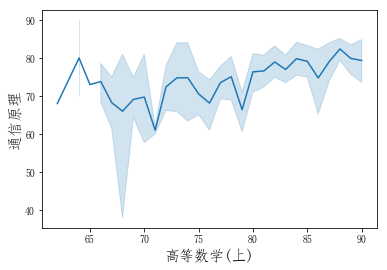

In [242]:
sns.lineplot(df1_Es['A'], df1_Es['E'])
plt.xlabel('高等数学(上)', size= 15)
plt.ylabel('通信原理', size = 15)
plt.savefig('./高等数学(上)-通信原理.jpg')

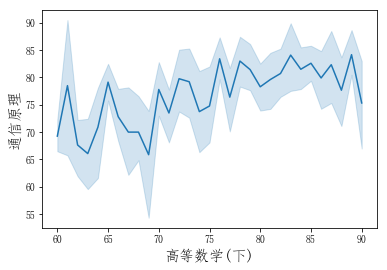

In [243]:
sns.lineplot(df1_Es['B'], df1_Es['E'])
plt.xlabel('高等数学(下)', size= 15)
plt.ylabel('通信原理', size = 15)
plt.savefig('./高等数学(下)-通信原理.jpg')

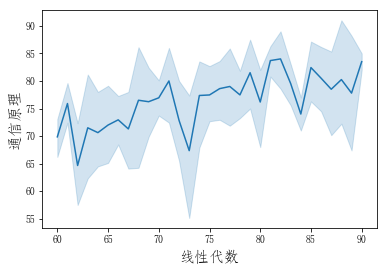

In [244]:
sns.lineplot(df1_Es['C'], df1_Es['E'])
plt.xlabel('线性代数', size= 15)
plt.ylabel('通信原理', size = 15)
plt.savefig('./线性代数-通信原理.jpg')

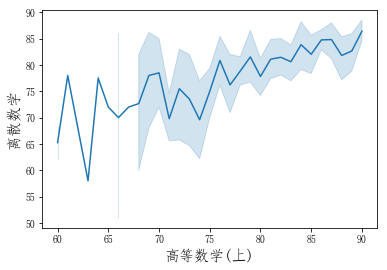

In [245]:
sns.lineplot(df2_Es['A'], df2_Es['E'])
plt.xlabel('高等数学(上)', size= 15)
plt.ylabel('离散数学', size = 15)
plt.savefig('./高等数学(上)-离散数学.jpg')

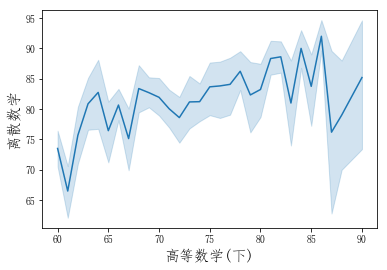

In [248]:
sns.lineplot(df2_Es['B'], df2_Es['E'])
plt.xlabel('高等数学(下)', size= 15)
plt.ylabel('离散数学', size = 15)
plt.savefig('./高等数学(下)-离散数学.jpg')

In [250]:
sns.lineplot(df2_Es['C'], df2_Es['E'])
plt.xlabel('线性代数', size= 15)
plt.ylabel('离散数学', size = 15
plt.savefig('./线性代数-离散数学.jpg')           

SyntaxError: invalid syntax (<ipython-input-250-3ce6808525bc>, line 4)

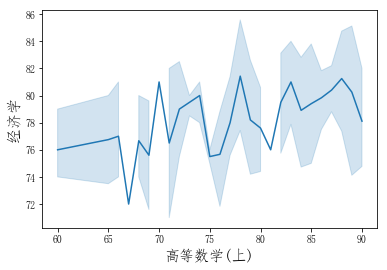

In [251]:
sns.lineplot(df3_Es['A'], df3_Es['E'])
plt.xlabel('高等数学(上)', size= 15)
plt.ylabel('经济学', size = 15)
plt.savefig('./高等数学(上)-经济学.jpg')

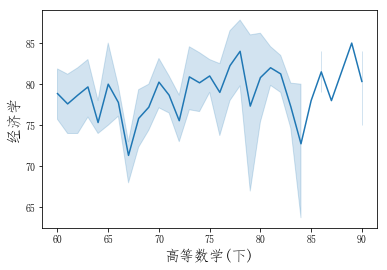

In [252]:
sns.lineplot(df3_Es['B'], df3_Es['E'])
plt.xlabel('高等数学(下)', size= 15)
plt.ylabel('经济学', size = 15)
plt.savefig('./高等数学(下)-经济学.jpg')

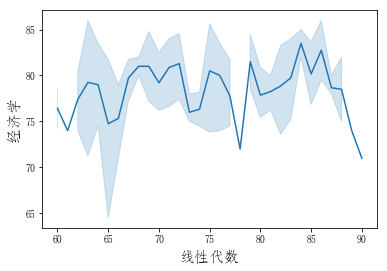

In [253]:
sns.lineplot(df3_Es['C'], df3_Es['E'])
plt.xlabel('线性代数', size= 15)
plt.ylabel('经济学', size = 15)
plt.savefig('./线性代数-经济学.jpg')

In [40]:
##################################################################
# 处理训练集
# df1 efghi
# df2 efghij
# df3 defgh

In [165]:
# df1 efghi
for index, row in df1_Es.iterrows():
    if(df1_Es.loc[index][0] < 60 or df1_Es.loc[index][0] > 90):
        df1_Es = df1_Es.drop(index=index)
        continue
    if(df1_Es.loc[index][1] < 60 or df1_Es.loc[index][1] > 90):
        df1_Es = df1_Es.drop(index=index)
        continue
    if(df1_Es.loc[index][2] < 60 or df1_Es.loc[index][2] > 90):
        df1_Es = df1_Es.drop(index=index)
        continue

In [166]:
for index, row in df1_Fs.iterrows():
    if(df1_Fs.loc[index][0] < 60 or df1_Fs.loc[index][0] > 90):
        df1_Fs = df1_Fs.drop(index=index)
        continue
    if(df1_Fs.loc[index][1] < 60 or df1_Fs.loc[index][1] > 90):
        df1_Fs = df1_Fs.drop(index=index)
        continue
    if(df1_Fs.loc[index][2] < 60 or df1_Fs.loc[index][2] > 90):
        df1_Fs = df1_Fs.drop(index=index)
        continue

In [167]:
for index, row in df1_Gs.iterrows():
    if(df1_Gs.loc[index][0] < 60 or df1_Gs.loc[index][0] > 90):
        df1_Gs = df1_Gs.drop(index=index)
        continue
    if(df1_Gs.loc[index][1] < 60 or df1_Gs.loc[index][1] > 90):
        df1_Gs = df1_Gs.drop(index=index)
        continue
    if(df1_Gs.loc[index][2] < 60 or df1_Gs.loc[index][2] > 90):
        df1_Gs = df1_Gs.drop(index=index)
        continue

In [168]:
for index, row in df1_Hs.iterrows():
    if(df1_Hs.loc[index][0] < 60 or df1_Hs.loc[index][0] > 90):
        df1_Hs = df1_Hs.drop(index=index)
        continue
    if(df1_Hs.loc[index][1] < 60 or df1_Hs.loc[index][1] > 90):
        df1_Hs = df1_Hs.drop(index=index)
        continue
    if(df1_Hs.loc[index][2] < 60 or df1_Hs.loc[index][2] > 90):
        df1_Hs = df1_Hs.drop(index=index)
        continue

In [169]:
for index, row in df1_Is.iterrows():
    if(df1_Is.loc[index][0] < 60 or df1_Is.loc[index][0] > 90):
        df1_Is = df1_Is.drop(index=index)
        continue
    if(df1_Is.loc[index][1] < 60 or df1_Is.loc[index][1] > 90):
        df1_Is = df1_Is.drop(index=index)
        continue
    if(df1_Is.loc[index][2] < 60 or df1_Is.loc[index][2] > 90):
        df1_Is = df1_Is.drop(index=index)
        continue

In [170]:
# df2 efghij
for index, row in df2_Es.iterrows():
    if(df2_Es.loc[index][0] < 60 or df2_Es.loc[index][0] > 90):
        df2_Es = df2_Es.drop(index=index)
        continue
    if(df2_Es.loc[index][1] < 60 or df2_Es.loc[index][1] > 90):
        df2_Es = df2_Es.drop(index=index)
        continue
    if(df2_Es.loc[index][2] < 60 or df2_Es.loc[index][2] > 90):
        df2_Es = df2_Es.drop(index=index)
        continue
    if(df2_Es.loc[index][3] < 60 or df2_Es.loc[index][3] > 90):
        df2_Es = df2_Es.drop(index=index)
        continue

In [171]:
for index, row in df2_Fs.iterrows():
    if(df2_Fs.loc[index][0] < 60 or df2_Fs.loc[index][0] > 90):
        df2_Fs = df2_Fs.drop(index=index)
        continue
    if(df2_Fs.loc[index][1] < 60 or df2_Fs.loc[index][1] > 90):
        df2_Fs = df2_Fs.drop(index=index)
        continue
    if(df2_Fs.loc[index][2] < 60 or df2_Fs.loc[index][2] > 90):
        df2_Fs = df2_Fs.drop(index=index)
        continue
    if(df2_Fs.loc[index][3] < 60 or df2_Fs.loc[index][3] > 90):
        df2_Fs = df2_Fs.drop(index=index)
        continue

In [172]:
for index, row in df2_Gs.iterrows():
    if(df2_Gs.loc[index][0] < 60 or df2_Gs.loc[index][0] > 90):
        df2_Gs = df2_Gs.drop(index=index)
        continue
    if(df2_Gs.loc[index][1] < 60 or df2_Gs.loc[index][1] > 90):
        df2_Gs = df2_Gs.drop(index=index)
        continue
    if(df2_Gs.loc[index][2] < 60 or df2_Gs.loc[index][2] > 90):
        df2_Gs = df2_Gs.drop(index=index)
        continue
    if(df2_Gs.loc[index][3] < 60 or df2_Gs.loc[index][3] > 90):
        df2_Gs = df2_Gs.drop(index=index)
        continue

In [173]:
for index, row in df2_Hs.iterrows():
    if(df2_Hs.loc[index][0] < 60 or df2_Hs.loc[index][0] > 90):
        df2_Hs = df2_Hs.drop(index=index)
        continue
    if(df2_Hs.loc[index][1] < 60 or df2_Hs.loc[index][1] > 90):
        df2_Hs = df2_Hs.drop(index=index)
        continue
    if(df2_Hs.loc[index][2] < 60 or df2_Hs.loc[index][2] > 90):
        df2_Hs = df2_Hs.drop(index=index)
        continue
    if(df2_Hs.loc[index][3] < 60 or df2_Hs.loc[index][3] > 90):
        df2_Hs = df2_Hs.drop(index=index)
        continue

In [174]:
for index, row in df2_Is.iterrows():
    if(df2_Is.loc[index][0] < 60 or df2_Is.loc[index][0] > 90):
        df2_Is = df2_Is.drop(index=index)
        continue
    if(df2_Is.loc[index][1] < 60 or df2_Is.loc[index][1] > 90):
        df2_Is = df2_Is.drop(index=index)
        continue
    if(df2_Is.loc[index][2] < 60 or df2_Is.loc[index][2] > 90):
        df2_Is = df2_Is.drop(index=index)
        continue
    if(df2_Is.loc[index][3] < 60 or df2_Is.loc[index][3] > 90):
        df2_Is = df2_Is.drop(index=index)
        continue

In [175]:
for index, row in df2_Js.iterrows():
    if(df2_Js.loc[index][0] < 60 or df2_Js.loc[index][0] > 90):
        df2_Js = df2_Js.drop(index=index)
        continue
    if(df2_Js.loc[index][1] < 60 or df2_Js.loc[index][1] > 90):
        df2_Js = df2_Js.drop(index=index)
        continue
    if(df2_Js.loc[index][2] < 60 or df2_Js.loc[index][2] > 90):
        df2_Js = df2_Js.drop(index=index)
        continue
    if(df2_Js.loc[index][3] < 60 or df2_Js.loc[index][3] > 90):
        df2_Js = df2_Js.drop(index=index)
        continue

In [176]:
# df3 defgh

In [177]:
for index, row in df3_Ds.iterrows():
    if(df3_Ds.loc[index][0] < 60 or df3_Ds.loc[index][0] > 90):
        df3_Ds = df3_Ds.drop(index=index)
        continue
    if(df3_Ds.loc[index][1] < 60 or df3_Ds.loc[index][1] > 90):
        df3_Ds = df3_Ds.drop(index=index)
        continue
    if(df3_Ds.loc[index][2] < 60 or df3_Ds.loc[index][2] > 90):
        df3_Ds = df3_Ds.drop(index=index)
        continue

In [178]:
for index, row in df3_Es.iterrows():
    if(df3_Es.loc[index][0] < 60 or df3_Es.loc[index][0] > 90):
        df3_Es = df3_Es.drop(index=index)
        continue
    if(df3_Es.loc[index][1] < 60 or df3_Es.loc[index][1] > 90):
        df3_Es = df3_Es.drop(index=index)
        continue
    if(df3_Es.loc[index][2] < 60 or df3_Es.loc[index][2] > 90):
        df3_Es = df3_Es.drop(index=index)
        continue

In [179]:
for index, row in df3_Fs.iterrows():
    if(df3_Fs.loc[index][0] < 60 or df3_Fs.loc[index][0] > 90):
        df3_Fs = df3_Fs.drop(index=index)
        continue
    if(df3_Fs.loc[index][1] < 60 or df3_Fs.loc[index][1] > 90):
        df3_Fs = df3_Fs.drop(index=index)
        continue
    if(df3_Fs.loc[index][2] < 60 or df3_Fs.loc[index][2] > 90):
        df3_Fs = df3_Fs.drop(index=index)
        continue

In [180]:
for index, row in df3_Gs.iterrows():
    if(df3_Gs.loc[index][0] < 60 or df3_Gs.loc[index][0] > 90):
        df3_Gs = df3_Gs.drop(index=index)
        continue
    if(df3_Gs.loc[index][1] < 60 or df3_Gs.loc[index][1] > 90):
        df3_Gs = df3_Gs.drop(index=index)
        continue
    if(df3_Gs.loc[index][2] < 60 or df3_Gs.loc[index][2] > 90):
        df3_Gs = df3_Gs.drop(index=index)
        continue

In [181]:
for index, row in df3_Hs.iterrows():
    if(df3_Hs.loc[index][0] < 60 or df3_Hs.loc[index][0] > 90):
        df3_Hs = df3_Hs.drop(index=index)
        continue
    if(df3_Hs.loc[index][1] < 60 or df3_Hs.loc[index][1] > 90):
        df3_Hs = df3_Hs.drop(index=index)
        continue
    if(df3_Hs.loc[index][2] < 60 or df3_Hs.loc[index][2] > 90):
        df3_Hs = df3_Hs.drop(index=index)
        continue

In [240]:
def train_test_df1(train_df):
    df_train, df_test = train_test_split(train_df, test_size=0.1, random_state=0)
    df_train_X = df_train.iloc[:, :-1]
    df_train_Y = df_train.iloc[:, -1]
    df_test_X = df_test.iloc[:, :-1]
    df_test_Y = df_test.iloc[:, -1].values
    
    linreg = LinearRegression()
    model=linreg.fit(df_train_X, df_train_Y)
    predict_Y = linreg.predict(df_test_X)
    acc_linreg = round(linreg.score(df_train_X, df_train_Y) * 100, 2)
    print('linreg:',acc_linreg)
    
    # Gaussian Naive Bayes
    gaussian = GaussianNB()
    gaussian.fit(df_train_X, df_train_Y)
    Y_pred = gaussian.predict(df_test_X)
    acc_gaussian = round(gaussian.score(df_train_X, df_train_Y) * 100, 2)
    print('gaussian:',acc_gaussian)
    
    # Perceptron
    perceptron = Perceptron()
    perceptron.fit(df_train_X, df_train_Y)
    Y_pred = perceptron.predict(df_test_X)
    acc_perceptron = round(perceptron.score(df_train_X, df_train_Y) * 100, 2)
    print('perceptron:',acc_perceptron)
    
    # Linear SVC
    linear_svc = LinearSVC()
    linear_svc.fit(df_train_X, df_train_Y)
    Y_pred = linear_svc.predict(df_test_X)
    acc_linear_svc = round(linear_svc.score(df_train_X, df_train_Y) * 100, 2)
    print('linear_svc:',acc_linear_svc)
    # a1 = list((linreg.predict(df_test_X)))
    # a2 = list(df_test_Y)
    
    # Stochastic Gradient Descent
    sgd = SGDClassifier()
    sgd.fit(df_train_X, df_train_Y)
    Y_pred = sgd.predict(df_test_X)
    acc_sgd = round(sgd.score(df_train_X, df_train_Y) * 100, 2)
    print('sgd:',acc_sgd)
    
    # Decision Tree
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(df_train_X, df_train_Y)
    Y_pred = decision_tree.predict(df_test_X)
    acc_decision_tree = round(decision_tree.score(df_train_X, df_train_Y) * 100, 2)
    print('decision_tree:',acc_decision_tree)
    
    # 建立一个默认的xgboost回归模型
    reg = XGBRegressor()
    reg.fit(df_train_X, df_train_Y)
    y_pred = reg.predict(df_test_X)
    acc_reg = round(reg.score(df_train_X, df_train_Y) * 100, 2)
    print('acc_reg:',acc_reg)

    print(predict_Y)
    print(Y_pred)
    print(df_test_Y)
    
    sns.lineplot(df_test_X['A'], predict_Y)
    sns.lineplot(df_test_X['A'], df_test_Y)
    sns.lineplot(df_test_X['A'], Y_pred)
    
    # plt.plot(df_test_X, df_test_Y, color='red')
    # roc_auc_score(df_test_Y,predict_Y)
    # print(explained_variance_score(a1,a2))
    print (model)
    # 训练后模型截距
    print (linreg.intercept_)
    # 训练后模型权重
    print (linreg.coef_)
    
    # return a1,a2


linreg: 13.33
gaussian: 15.43
perceptron: 3.54


D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWar

linear_svc: 4.18
sgd: 4.82
decision_tree: 98.07
[19:26:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
acc_reg: 52.28
[68.5290129  80.97659585 69.62173268 76.3588136  85.29526763 75.59680927
 79.67150887 70.38940985 70.86654069 80.1641014  82.88150666 75.91419804
 80.62820898 72.50173626 71.15453421 71.69175496 73.59182851 76.40062522
 74.43269355 67.31299328 81.40879504 80.56237152 79.87599351 74.85247636
 81.94338826 81.56107234 67.17141514 68.43994555 77.90756933 85.27698934
 67.49112799 76.89401369 77.6775307  79.35967858 80.89278354]
[82. 72. 38. 68. 82. 82. 85. 66. 89. 82. 80. 60. 70. 65. 65. 84. 78. 81.
 73. 90. 94. 79. 77. 66. 92. 79. 38. 90. 81. 82. 66. 82. 82. 85. 82.]
[66. 89. 61. 91. 86. 44. 83. 64. 81. 90. 93. 64. 85. 76. 68. 61. 76. 76.
 88. 62. 86. 73. 73. 60. 77. 90. 73. 61. 77. 77. 62. 78. 60. 74. 89.]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
24.094630924979114


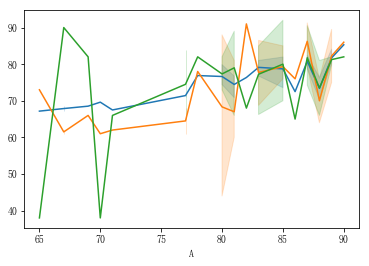

In [241]:
train_test_df1(df1_Es)

In [193]:
# df1 efghi
# df2 efghij
# df3 defgh
train_test_df1(df1_Es)
train_test_df1(df1_Fs)
train_test_df1(df1_Gs)
train_test_df1(df1_Hs)
train_test_df1(df1_Is)

train_test_df1(df2_Es)
train_test_df1(df2_Fs)
train_test_df1(df2_Gs)
train_test_df1(df2_Hs)
train_test_df1(df2_Is)
train_test_df1(df2_Js)

train_test_df1(df3_Ds)
train_test_df1(df3_Es)
train_test_df1(df3_Fs)
train_test_df1(df3_Gs)
train_test_df1(df3_Hs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
19.335901688414545
[0.2133565  0.36051792 0.17990271]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
-21.18814759599836
[0.36233559 0.51363386 0.34679056]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
27.21774469674274
[0.17926017 0.11025065 0.32733988]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
35.022193961290384
[0.05552332 0.16468825 0.28686738]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
28.553802980723304
[0.06985825 0.26301396 0.28910157]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
11.553588278968022
[0.33396385 0.34228185 0.10734213 0.13721656]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
21.650477071819793
[0.13961542 0.33771515 0

In [ ]:
# Decision Tree

# decision_tree = DecisionTreeClassifier()
# decision_tree.fit(df1_E_train_X, df1_E_train_Y)
# Y_pred_decision_tree = decision_tree.predict(df1_E_test_X)
# acc_decision_tree = round(decision_tree.score(df1_E_train_X, df1_E_train_Y) * 100, 2)
# acc_decision_tree

In [ ]:
# Logistic Regression
# logreg = LogisticRegression()
# logreg.fit(df1_E_train_X, df1_E_train_Y)
# Y_preg_logreg = logreg.predict(df1_E_test_X)
# acc_log = round(logreg.score(df1_E_train_X, df1_E_train_Y) * 100, 2)
# acc_log